In [1]:
from src.first_compressions import *
from torch.utils.data import Dataset, DataLoader

import Casia2


self.size=1379
['../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00028.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00055.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00017.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00063.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_sec_00097.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00039.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00041.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00047.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00055.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_txt_00073.jpg']
['../images/CASIA2/CASIA2.0_revised/Tp/Tp_D_CND_S_N_txt00028_txt00006_10848.jpg', '../images/CASIA2/CASIA2.0_revised/Tp/Tp_D_CNN_S_B_txt00055_txt00047_11328.jpg', '../images/CASIA2/CASIA2.0_revised/Tp/Tp_D_CRN_M_N_txt00017_txt00063_10836.jpg', '../images/CASIA2/CASIA2.0_revised/Tp/Tp_D_CRN_M_N_txt00063_txt00017_10835.jpg', '../images/CASIA2/CASIA2.0_revised/Tp/Tp_D_CRN_S_N_sec00097_txt00070_11317.jpg', '../imag

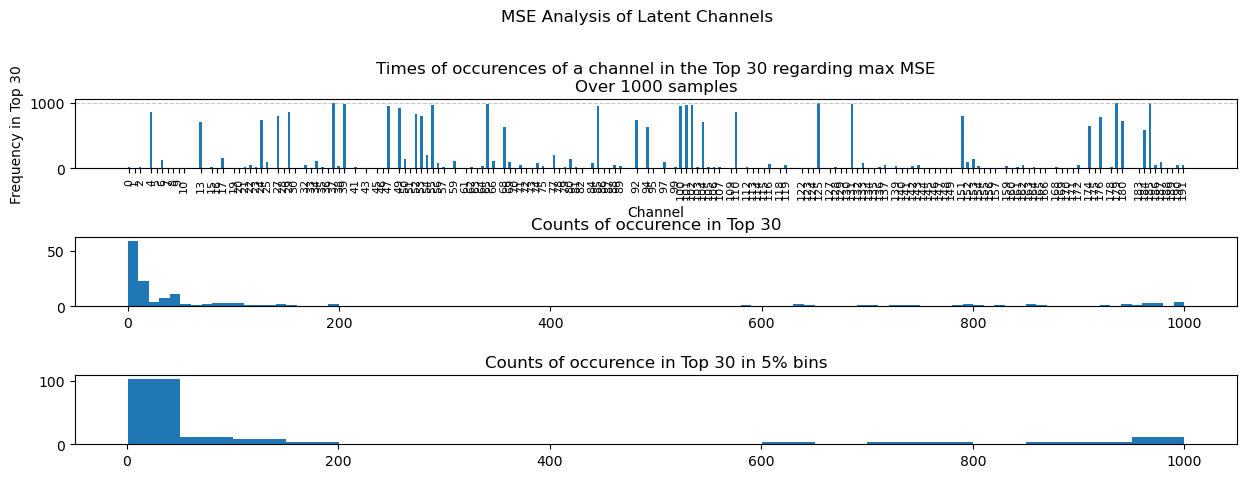

The top channels regarding max MSE (In Top30 channels for >80.0% of 1000 samples) are: 
[  4.  29.  37.  39.  47.  49.  52.  55.  65.  85. 100. 101. 102. 110.
 125. 131. 151. 179. 185.])


In [2]:
casia2_data = Casia2.Casia2Dataset(Casia2.CASIA_PATH)
casia2_loader = DataLoader(casia2_data, batch_size=1, shuffle=True)

auth_data, tp_data = casia2_data.paths_per_cat()

auth_list = [item for sublist in auth_data.values() for item in sublist]
tp_list = [item for sublist in tp_data.values() for item in sublist]

n_imgs = 1000
top_channels = 30

# Show class distribution (AUTH)
print("Classes of auth data")
for key, val in auth_data.items():
    print(key, ":", len(val))

cheng_model = cai.zoo.cheng2020_anchor(6, pretrained=True)
cheng_model.update()

img_pairs = list(zip(auth_list, tp_list))
mse_tensor, most_changed_channels = assess_manipulated_images(img_pairs[:n_imgs], cheng_model, n_assess_dims=192, quantize=False)

plot_max_mse_channels(most_changed_channels[:, :top_channels], n_channels=top_channels, plot_title="MSE Analysis of Latent Channels")

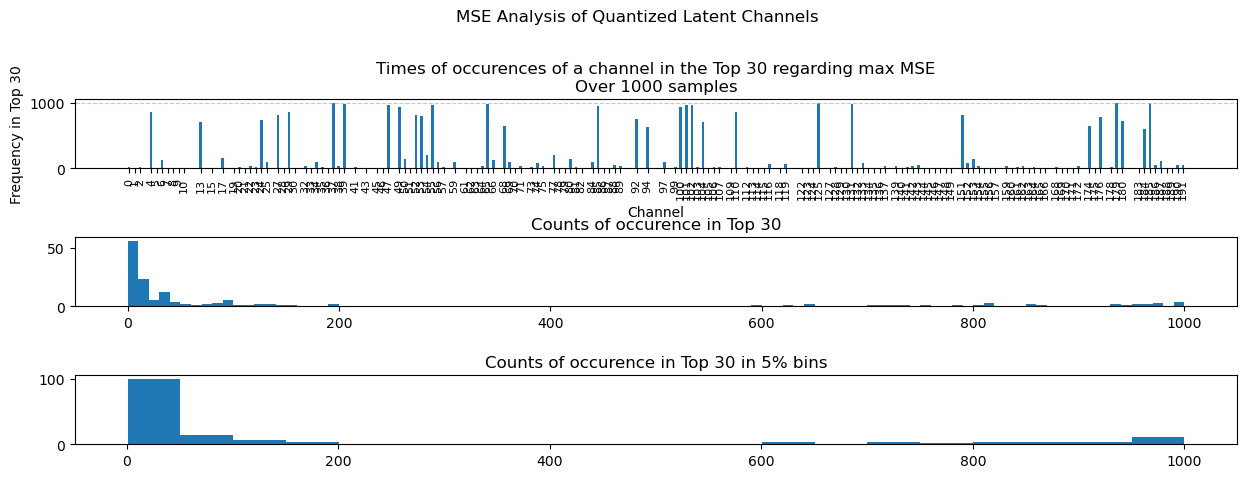

The top channels regarding max MSE (In Top30 channels for >80.0% of 1000 samples) are: 
[  4.  27.  29.  37.  39.  47.  49.  52.  53.  55.  65.  85. 100. 101.
 102. 110. 125. 131. 151. 179. 185.])


In [3]:
mse_tensor_q, most_changed_channels_q = assess_manipulated_images(img_pairs[:n_imgs], cheng_model, n_assess_dims=192, quantize=True)

plot_max_mse_channels(most_changed_channels_q[:, :top_channels], n_channels=top_channels, plot_title="MSE Analysis of Quantized Latent Channels")